# FiSC Modeling

In case I don't get enough data to model on with the homelessness set.




In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#standard scaler
# lin reg
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeRegressor, plot_tree

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv('fisc_data.csv')
df.head()

,year,city_name,city_types,id_city,city_population,cpi,rev_total_city,rev_general_city,intergovt_rev_city,igr_federal_city,...,cash_other_offsets,cash_other_bonds,cash_other_other,county_name,id_county,county_population,relationship_city_school,enrollment,districts_in_city,consolidated_govt
0,1977,AK: Anchorage,core,22002001,174500,4.044885,5342.24,4956.92,2148.77,279.32,...,178.51,787.93,691.32,NaN,NaN,NaN,4.0,36855.0,NaN,1.0
1,1978,AK: Anchorage,core,22002001,177000,3.759509,5948.99,5490.05,2468.11,403.24,...,187.53,1395.82,1158.01,NaN,NaN,NaN,4.0,36804.0,NaN,1.0
2,1979,AK: Anchorage,core,22002001,179600,3.376308,6158.68,5746.64,2573.34,496.97,...,249.03,1812.04,1314.62,NaN,NaN,NaN,4.0,36757.0,NaN,1.0
3,1980,AK: Anchorage,core,22002001,178800,2.974757,5654.93,5210.77,2313.62,371.46,...,986.73,1330.72,1572.66,NaN,NaN,NaN,4.0,36008.0,NaN,1.0
4,1981,AK: Anchorage,core,22002001,174431,2.696590,6192.83,5736.81,2771.43,338.76,...,977.32,1549.51,1669.55,NaN,NaN,NaN,4.0,34557.0,NaN,1.0


In [3]:
df.shape

(8938, 663)

In [4]:
df[['city_population', 'rev_general_city', 
    'police_city','social_services_city','admin_judicial_city',
    'education_services_city']].sort_values(by='rev_general_city', ascending=False).head(10)



,city_population,rev_general_city,police_city,social_services_city,admin_judicial_city,education_services_city
1547,570681,19695.71,1036.59,5578.57,169.41,3297.08
1556,675254,19342.07,897.42,6822.65,200.43,4296.92
1548,574404,19322.98,1171.16,6343.37,213.80,4532.70
1555,662513,19318.35,912.67,6733.37,167.12,4365.06
1557,686575,19006.13,922.41,6686.37,215.82,4369.37
1546,567136,18596.09,1057.44,5381.26,154.14,3245.03
1552,619602,18515.94,971.41,6096.90,186.01,4199.41
1553,634725,18489.08,927.95,6421.14,190.37,4286.93
1551,605085,18423.33,1064.41,6206.64,205.31,4358.31
1550,592228,18249.41,1079.86,6252.47,226.64,4719.30


In [5]:
drop_cols = ['parks_recreation_city', 'year', 'city_name', 'city_types', 'id_city','cpi']

In [6]:
# trying LinReg with all columns, ignoring collinearity
X = df.drop(columns=drop_cols)
X = X.dropna(axis=1)
y = df['parks_recreation_city']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


In [8]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [9]:
lr = LinearRegression()
lr.fit(X_train_sc, y_train)
lr.score(X_train_sc, y_train), lr.score(X_test_sc, y_test)

(0.9999154047606224, 0.9994006205227319)

This linear regression is likely overfitting and has a ton of multicollinearity. Below we'll try only including a few select features out of the 600+ available.

In [10]:
preds = lr.predict(X_test_sc)
preds

array([152.74130392,  25.16607512,  15.60179138, ..., 202.62870043,
        83.94691104, 200.70426427])

### Attempt 2
----

In [11]:
X_1 = df[['city_population', 
        'rev_general_city', 
        'police_city',
        'social_services_city',
        'admin_judicial_city',
        'education_services_city',
       'spend_intergovt_city',
       'transportation_city']]

X_2 = df[[ 
        'rev_general_city', 
        'police_city',
        'social_services_city',
        'admin_judicial_city',
        'education_services_city',
       'spend_intergovt_city',
       'transportation_city']]

In [12]:
X = df[['city_population', 
        'rev_general_city', 
        'police_city',
        'social_services_city',
        'admin_judicial_city',
        'education_services_city',
       'spend_intergovt_city',
       'transportation_city']]

y = df['parks_recreation_city']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [13]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [14]:
X_t_sc_pd = pd.DataFrame(X_train_sc, columns=X_train.columns)
X_t_sc_pd

,city_population,rev_general_city,police_city,social_services_city,admin_judicial_city,education_services_city,spend_intergovt_city,transportation_city
0,-0.296947,-0.743735,-0.178900,-0.281343,-0.610802,-0.443122,-0.158060,-0.509400
1,-0.205600,-0.763487,-0.427261,-0.282195,-0.643785,-0.394222,-0.158060,-0.541518
2,-0.169303,-0.068906,-0.224983,-0.209330,0.364422,-0.374102,-0.158060,-0.543674
3,-0.361930,-0.855750,-1.260404,-0.282195,-0.749568,-0.443122,-0.158060,-0.679349
4,-0.359270,-0.420882,-0.277302,-0.222134,-0.748677,-0.439394,-0.158060,-0.789560
...,...,...,...,...,...,...,...,...
6698,0.076116,-0.622037,-0.625433,-0.225746,-0.059602,-0.412122,-0.158060,0.773985
6699,-0.042610,-0.675944,-0.425056,-0.183743,-0.439945,-0.414092,-0.158060,-0.559183
6700,-0.305167,-0.798175,-1.002613,-0.281668,-0.749568,-0.443122,-0.148307,-0.382167
6701,-0.295968,0.890837,-0.302776,-0.187416,-0.504128,1.604900,-0.158060,1.189407


<AxesSubplot:>

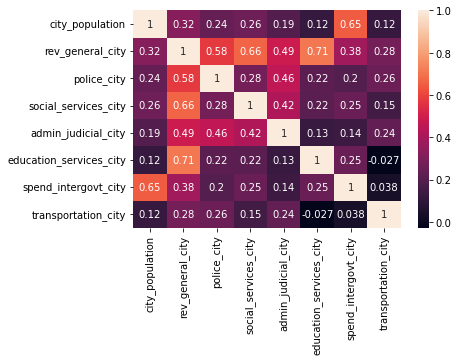

In [15]:
sns.heatmap(X_t_sc_pd.corr(), annot=True)

In [16]:
lr = LinearRegression()
lr.fit(X_train_sc, y_train)
lr.score(X_train_sc, y_train), lr.score(X_test_sc, y_test)

(0.17836881792564718, 0.23021925833397072)

In [17]:
preds = lr.predict(X_test_sc)
preds

array([ 84.04811425,  76.49056433,  72.60247471, ..., 142.77758716,
        94.25578009, 146.65777088])

In [47]:
mean_squared_error(y_test, preds, squared=False)

86.25438175984985

### Decision Tree Attempt
-----

In [32]:
drop_cols = ['parks_recreation_city', 'year', 'city_name', 'city_types', 'id_city','cpi']

In [33]:
# trying LinReg with all columns, ignoring collinearity
X = df.drop(columns=drop_cols)
X = X.dropna(axis=1)
y = df['parks_recreation_city']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


In [ ]:
X_train.shape

In [35]:
dc = DecisionTreeRegressor(max_depth=50, random_state=1)

In [36]:
dc.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=50, random_state=1)

In [37]:
dc.score(X_test, y_test)

0.9156515992440903

In [38]:
#plot_tree(dc, feature_names=X_train.columns, rounded=True, filled=True);

In [39]:
params = {'max_depth': range(1,50)}

In [40]:
gs = GridSearchCV(
    DecisionTreeRegressor(), param_grid=params)

In [41]:
gs.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(1, 50)})

In [42]:
gs.score(X_train, y_train), gs.score(X_test, y_test)

(1.0, 0.9141425241549098)

In [43]:
gs.best_params_

{'max_depth': 29}

In [44]:
gs_preds = gs.predict(X_test)

In [45]:
mean_squared_error(y_test, gs_preds, squared=False)

28.80624857332188

----